In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer

In [30]:
# Sample data
data = {
    'x1': [4.0, 5.0, np.nan, 6.0, 7.0, 9.0],
    'x2': [3.0, 5.0, 6.0, 5.0, np.nan, 5.0],
    'x3': [10, 11, 12, 9, 8, 11],
    'x4': ['A', 'A', 'C', 'C', 'D', np.nan],
    'x5': ['X', 'Y', 'X', 'X', np.nan, 'Y'],
    'x6': ['M', 'M', np.nan, 'M', 'N', np.nan]
}

df = pd.DataFrame(data)
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


## Pandas (simple Imputer mean)

In [26]:
df['x1']=df['x1'].fillna(df['x1'].mean())
df['x2']=df['x2'].fillna(df['x2'].mean())
df['x3']=df['x3'].fillna(df['x3'].mean())
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,6.2,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,4.8,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


## Pandas (simple Imputer modus & konstan)

In [27]:
df['x4']=df['x4'].fillna(df['x4'].mode()[0])
df['x5']=df['x5'].fillna(df['x5'].mode()[0])
df['x6']=df['x6'].fillna('P')
df

## Sklearn (simple imputer mean)

#create imputer
impute_num=SimpleImputer()

#fit_transform
df[['x1','x2','x3']]=impute_num.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


## Sklearn (simple imputer mean)

In [35]:
#create imputer
impute_num=SimpleImputer()

#fit_transform
df[['x1','x2','x3']]=impute_num.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


## Sklearn (simple Imputer modus & konstan)

In [37]:
#create imputer
impute_obj=SimpleImputer(strategy='most_frequent')
impute_const=SimpleImputer(strategy='constant',fill_value='P')

#fit_transform
df[['x4','x5']]=impute_obj.fit_transform(df[['x4','x5']])
df[['x6']]=impute_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


## Iterative Imputer

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [80]:
# Membuat DataFrame dari data yang diberikan
data = {
    'x1': [4, 5, np.nan, 6, 7, 9],
    'x2': [2, 5, 6, 4, np.nan,6],
    'x3': [9.0, 11.1, np.nan, 8.9, 9.1, 11.0],
    'x4': ['A', 'A', 'C', 'C', 'D', 'D']
}

df = pd.DataFrame(data)

df

,x1,x2,x3,x4
0,4.0,2.0,9.0,A
1,5.0,5.0,11.1,A
2,NaN,6.0,NaN,C
3,6.0,4.0,8.9,C
4,7.0,NaN,9.1,D
5,9.0,6.0,11.0,D


In [59]:
df1=df.dropna()
df1

,x1,x2
0,4.0,2.0
1,5.0,5.0
3,6.0,4.0
5,9.0,6.0


In [79]:
#create imputer
impute_iter=IterativeImputer(n_nearest_features=1)

#fit_transform
df[['x1','x2','x3']]=impute_iter.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.000000,2.000000,9.000000,A
1,5.000000,5.000000,11.100000,A
2,7.666234,6.000000,9.823372,C
3,6.000000,4.000000,8.900000,C
4,7.000000,5.017539,9.100000,D
5,9.000000,6.000000,11.000000,D


## KNN Imputer

In [84]:
# Membuat DataFrame dari data yang diberikan
data = {
    'x1': [4, 5, np.nan, 6, 7, 9],
    'x2': [2, 5, 6, 4, np.nan,6],
    'x3': [9.0, 11.1, np.nan, 8.9, 9.1, 11.0],
    'x4': ['A', 'A', 'C', 'C', 'D', 'D']
}

df = pd.DataFrame(data)

df

,x1,x2,x3,x4
0,4.0,2.0,9.0,A
1,5.0,5.0,11.1,A
2,NaN,6.0,NaN,C
3,6.0,4.0,8.9,C
4,7.0,NaN,9.1,D
5,9.0,6.0,11.0,D


In [82]:
#create imputer
impute_knn=KNNImputer(n_neighbors=1)

#fit_transform
df[['x1','x2','x3']]=impute_knn.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.0,2.0,9.0,A
1,5.0,5.0,11.1,A
2,9.0,6.0,11.0,C
3,6.0,4.0,8.9,C
4,7.0,4.0,9.1,D
5,9.0,6.0,11.0,D


## Outlier

In [85]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: ylabel='total_bill'>

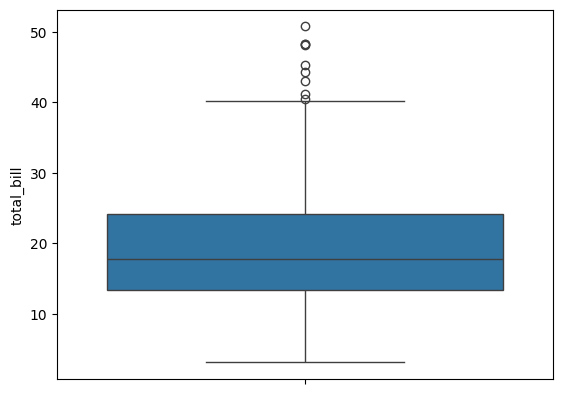

In [86]:
sns.boxplot(df['total_bill'])

<Axes: ylabel='total_bill'>

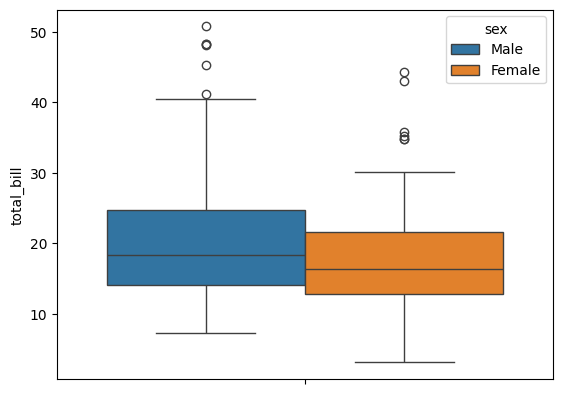

In [89]:
sns.boxplot(y=df['total_bill'],hue=df['sex'])

<Axes: ylabel='total_bill'>

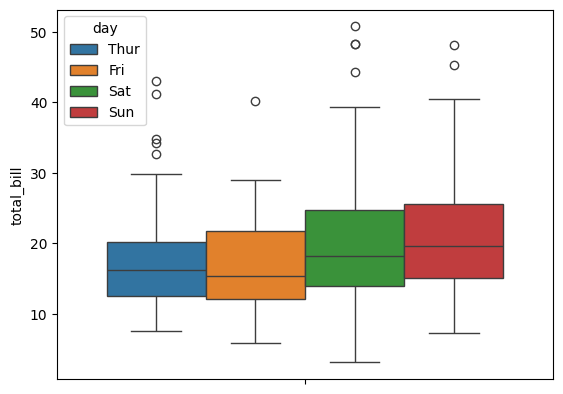

In [90]:
sns.boxplot(y=df['total_bill'],hue=df['day'])

<Axes: ylabel='total_bill'>

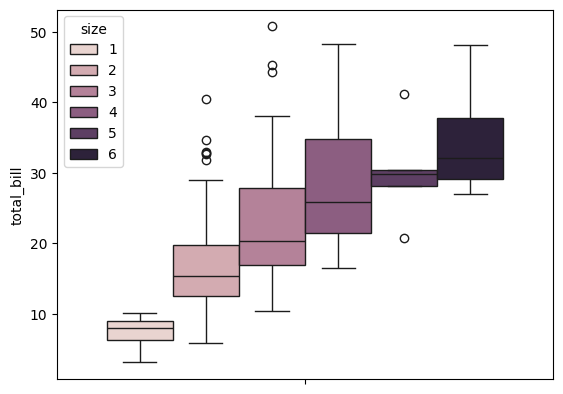

In [91]:
sns.boxplot(y=df['total_bill'],hue=df['size'])

<Axes: xlabel='size', ylabel='total_bill'>

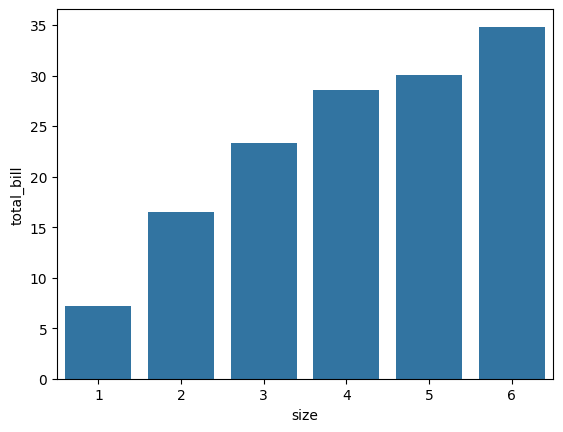

In [94]:
sns.barplot(data=df.groupby(['size'])['total_bill'].mean().reset_index(),x='size',y='total_bill')

<Axes: xlabel='size', ylabel='total_bill'>

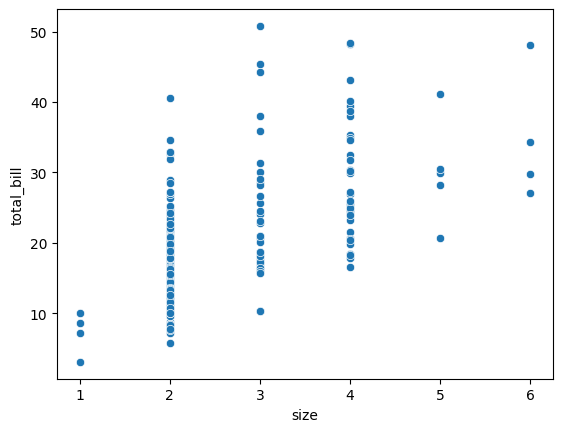

In [97]:
sns.scatterplot(x=df['size'],y=df['total_bill'])

<Axes: >

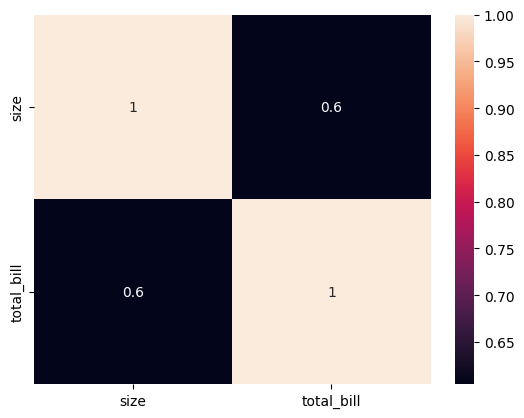

In [99]:
sns.heatmap(df[['size','total_bill']].corr(method='spearman'),annot=True)